# Visualização de Dados

## Histograma

### Importação bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Base de dados

In [2]:
base = pd.read_csv('trees.csv') #guarda na variável 'base' os dados em formato de DF.
base.shape #retorna em quantas linhas e colunas estão dispostos os dados

(31, 3)

In [3]:
base.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [4]:
h = np.histogram(base.iloc[:,1], bins = 6) 
h
#retorna arrays indicando que valores assumem o eixo y e x para a coluna especificada. No caso, a colun da altura.


(array([4, 2, 5, 7, 9, 4], dtype=int64),
 array([63., 67., 71., 75., 79., 83., 87.]))

### Referências

Para verificar parâmetos requeridos clicar nos links. <br>
[Documentação np.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) <br>
[Documentação .iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) <br>
[Como usar .loc](https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87) 



#### Uso do .loc
- Principal objetivo é filtrar linhas **a partir do nome do índice** (isto é, nome das linhas).

In [5]:
dados = [[1,2,3], [4,5,6], [7,8,9], [10,11,12]]
df = pd.DataFrame(dados,
                 index = ['lin1', 'lin2', 'lin3', 'lin4'],
                 columns = ['col1','col2','col3'])
df

,col1,col2,col3
lin1,1,2,3
lin2,4,5,6
lin3,7,8,9
lin4,10,11,12


In [6]:
df.loc['lin1'] #jeito de filtrar apenas a 'lin1'. Retorna uma series.

col1    1
col2    2
col3    3
Name: lin1, dtype: int64

In [7]:
df.loc[['lin1']] #adicionando mais um colchete retorna uma DF

,col1,col2,col3
lin1,1,2,3


In [8]:
df.loc[['lin1', 'lin3']] #filtra mais de uma linha

,col1,col2,col3
lin1,1,2,3
lin3,7,8,9


#### Uso do .iloc

- Permite fazer o filtro **através da posição** da linha no DF.

In [9]:
df.iloc[[0,2]]

,col1,col2,col3
lin1,1,2,3
lin3,7,8,9


In [10]:
df.iloc[0:3] #usando esse formato (0:3) nãp precisa fazer uma lista dentro do colchete

,col1,col2,col3
lin1,1,2,3
lin2,4,5,6
lin3,7,8,9


In [11]:
df.iloc[:3] #simplificando o de cima

,col1,col2,col3
lin1,1,2,3
lin2,4,5,6
lin3,7,8,9


**Abaixo**, forma de plotar as informações acima em um gráfico.

### Gráfico com Matplotlib

Text(0.5, 0, 'Altura')

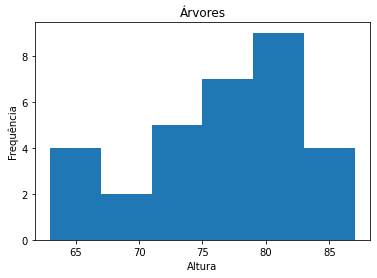

In [12]:
plt.hist(base.iloc[:,1], bins = 6)
plt.title('Árvores')
plt.ylabel('Frequência')
plt.xlabel('Altura')

### Gráfico com Seaborn

In [13]:
import seaborn as sns

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Árvores')

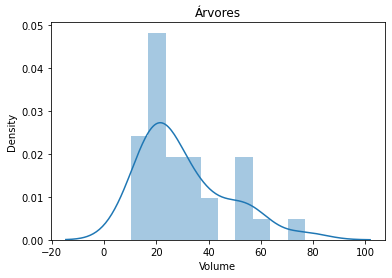

In [14]:
sns.distplot(base.Volume, bins = 10, axlabel = 'Volume').set_title('Árvores')

### Exemplo 2

**Banco de dados**: chicken.csv <br>
Como que se comporta o peso dos animais **em relação ao tipo** de alimento? <br>
Como os dados **estão distribuidos separadamente?** <br>
Cada tipo de alimento no seu próprio **histograma**.

In [15]:
base2 = pd.read_csv('chicken.csv')
base2

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
...,...,...
66,359,casein
67,216,casein
68,222,casein
69,283,casein


In [16]:
base = pd.read_csv('trees.csv')
base.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


- No retorno de dados acima é possível identificar **2 atributos** (colunas) correspondentes a peso e alimentação (tipo) dos frangos.

In [17]:
base2.head()

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean


#### Agrupando a partir do feed. Groupby

- Abaixo como faz para agrupar as informações a partir de um grupo. Agrupando a partir do feed.
- Deve retornar a soma dos pesos dos frangos categorizado pelos atributos do feed.

In [18]:
agrupado = base2.groupby(['feed'])['weight'].sum()
agrupado

feed
casein       3883
horsebean    1602
linseed      2625
meatmeal     3046
soybean      3450
sunflower    3947
Name: weight, dtype: int64

Pergunta a se fazer: 'Como os frangos alimentados com 'casein' estão distribuidos ?' - Histograma <br>
- Fazer novos dataframes para testar os filtros do pandas. <br>
1) fazer uma base de dados que tenham todos os registros com a alimentação horsebean
    

In [19]:
#uso .loc
teste = base2.loc[base2['feed'] == 'horsebean'] #.loc parece ser um filtro de localização de string. 
teste

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
5,168,horsebean
6,108,horsebean
7,124,horsebean
8,143,horsebean
9,140,horsebean


### Histogramas separados

- Abaixo como é gerado os histogramas que retornam o comportamento do peso (weight) dos frangos considerando o tipo de alimento do DF.

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'horsebean')

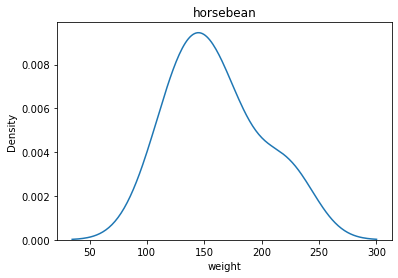

In [20]:
# filtro: base2.loc[base2['feed'] == 'horsebean'].weight
sns.distplot(base2.loc[base2['feed'] == 'horsebean'].weight, hist = False).set_title('horsebean')

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'casein')

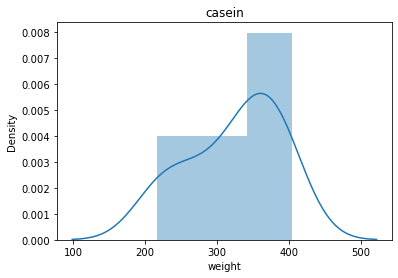

In [21]:
sns.distplot(base2.loc[base2['feed'] == 'casein'].weight).set_title('casein')

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'linseed')

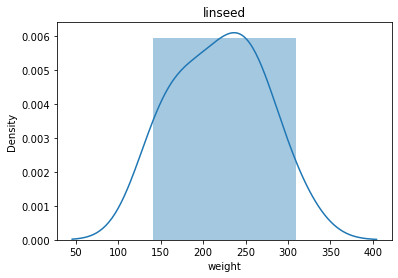

In [22]:
sns.distplot(base2.loc[base2['feed'] == 'linseed'].weight).set_title('linseed')

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'meatmeal')

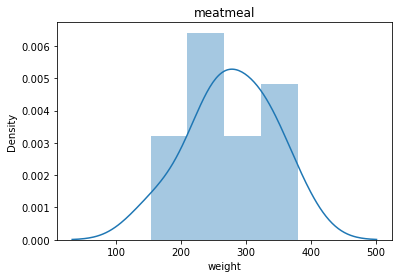

In [23]:
sns.distplot(base2.loc[base2['feed'] == 'meatmeal'].weight).set_title('meatmeal')

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'soybean')

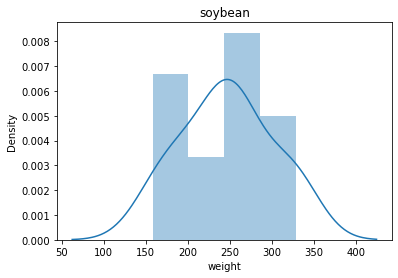

In [24]:
sns.distplot(base2.loc[base2['feed'] == 'soybean'].weight).set_title('soybean')

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'sunflower')

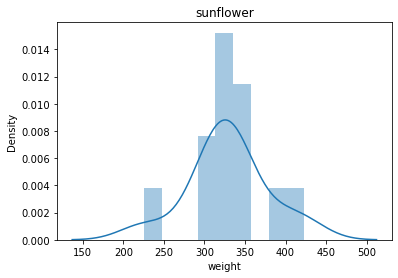

In [25]:
sns.distplot(base2.loc[base2['feed'] == 'sunflower'].weight).set_title('sunflower')

### Histogramas juntos em um único gráfico

Inserindo todos os gráficos em um mesmo gráfico temos que :

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

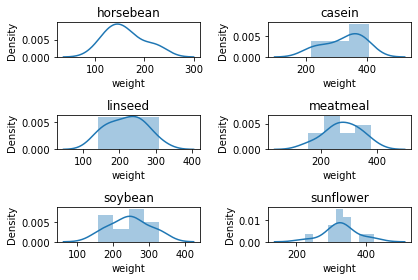

In [26]:
plt.figure()
plt.subplot(3,2,1) #retorna um gráfico com 3 linhas e 2 colunas em que a primeira posição será o que está escrito abaixo
sns.distplot(base2.loc[base2['feed'] == 'horsebean'].weight, hist = False).set_title('horsebean')
plt.subplot(3,2,2)
sns.distplot(base2.loc[base2['feed'] == 'casein'].weight).set_title('casein')
plt.subplot(3,2,3)
sns.distplot(base2.loc[base2['feed'] == 'linseed'].weight).set_title('linseed')
plt.subplot(3,2,4)
sns.distplot(base2.loc[base2['feed'] == 'meatmeal'].weight).set_title('meatmeal')
plt.subplot(3,2,5)
sns.distplot(base2.loc[base2['feed'] == 'soybean'].weight).set_title('soybean')
plt.subplot(3,2,6)
sns.distplot(base2.loc[base2['feed'] == 'sunflower'].weight).set_title('sunflower')
plt.tight_layout() #ajusta layout para não sobreposição


## Densidade


In [27]:
#Não esquecer de importar
##import pandas as pd
##import matplotlib.pyplot as plt
#import seaborn as sns

In [28]:
#base de dados
base = pd.read_csv('trees.csv') #dados de árvores
base.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


### Gráfico Densidade matplotlib

array([[<AxesSubplot:title={'center':'Height'}>]], dtype=object)

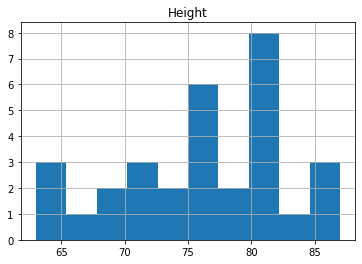

In [29]:
base.hist(column = 'Height') #modo simplificado

(array([3., 1., 2., 3., 2., 6., 2., 8., 1., 3.]),
 array([63. , 65.4, 67.8, 70.2, 72.6, 75. , 77.4, 79.8, 82.2, 84.6, 87. ]),
 <BarContainer object of 10 artists>)

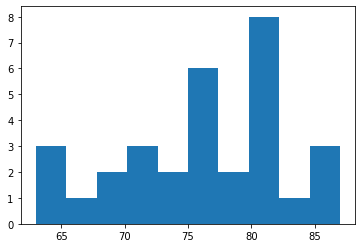

In [30]:
plt.hist(base.iloc[:,1]) #mesmo resultado do código acima usando iloc.

### Gráfico Densidade Seaborn

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height'>

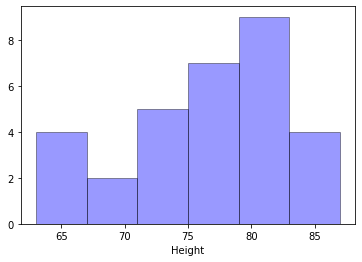

In [31]:
sns.distplot(base.iloc[:,1], hist = True, kde = False,
            bins = 6, color = 'blue',
            hist_kws = {'edgecolor': 'black'})

- **hist:  True** - Gerar o histograma
- **kde (estimativa de densidade do Kernel) = False** não vai gerar a linha de densidade.
- **hist_kws** : cor das bordas
- **bins = 6** . Número de eixo 

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

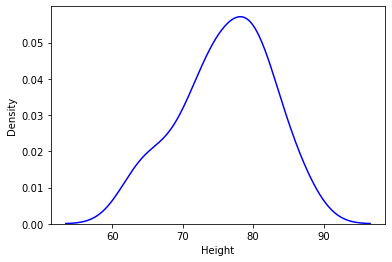

In [32]:
sns.distplot(base.iloc[:,1], hist = False, kde = True,
           bins = 6, color = 'blue',
           hist_kws={'edgecolor':'black'})

C:\Users\Christyna Dias\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

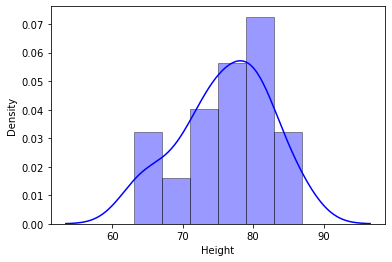

In [33]:

sns.distplot(base.iloc[:,1], hist = True, kde = True,
           bins = 6, color = 'blue',
           hist_kws={'edgecolor':'black'})

- Linha de densidade **suaviza os dados**. Reduz os picos pela forma que é calculada. 

## Gráfico Dispersão

In [34]:
#Não esquecer de importar
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

In [35]:
#carregamento da base de dados
base = pd.read_csv('trees.csv')
base.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


### Usando Matplotlib

- As linhas de código abaixo servem para construir o Gráfico de Dispersão. O **método 'scatter'** é um método do matplotlib que para seu uso **se faz necessário a importação desta forma < matplotlib.pyplot >**. Só quando importei desta forma foi que consegui fazer gerar o gráfico. 
- Observar atentamente os parâmetros exigidos no **método scatter**.


Text(0, 0.5, 'Circunferência')

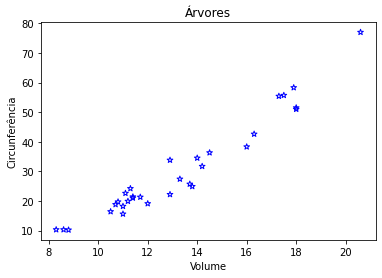

In [36]:
#construção do gráfico de dispersão considerando o volume e a dispersão.
plt.scatter(base.Girth, base.Volume, color = 'blue', facecolors = 'none', marker = '*') 
plt.title('Árvores')
plt.xlabel('Volume')
plt.ylabel('Circunferência')

- Ao se usar o método **plot** ao invés de **scatter** o gráfico retorna com linhas conectando pontos. <br>
VER ABAIXO

Text(0, 0.5, 'Circunferência')

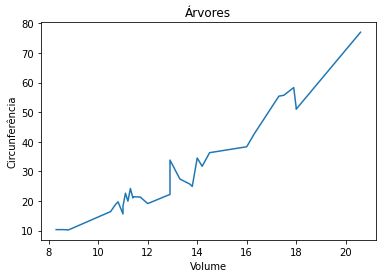

In [37]:
plt.plot(base.Girth, base.Volume) 
plt.title('Árvores')
plt.xlabel('Volume')
plt.ylabel('Circunferência')

### Usando Seaborn

In [38]:
base3 = pd.read_csv('co2.csv')
base3.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


#### .regplot

<AxesSubplot:xlabel='Girth', ylabel='Volume'>

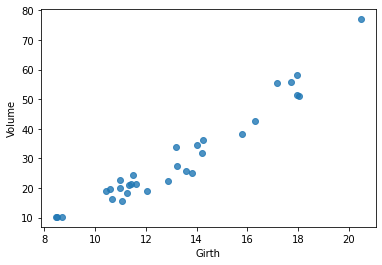

In [39]:
#Usando o seaborn
#sns.regplot(base.Girth, base.Volume, data = base, x_jitter = 0.3, fit_reg = False) Método aula
sns.regplot(x = "Girth", y = "Volume", data = base, x_jitter = 0.3, fit_reg = False) #método mais atual

#### scatterplot

- parâmetro **jitter** (tremulação) serve para afastar aleatoriamente pontos sobrepostos. 
- parâmetro **fit_reg** serve para dehabilitar linha de tendência. Por defaut ela aparecerá. É necessário inserir o parâmetro com **False** para ela desabilitar.

<AxesSubplot:xlabel='conc', ylabel='uptake'>

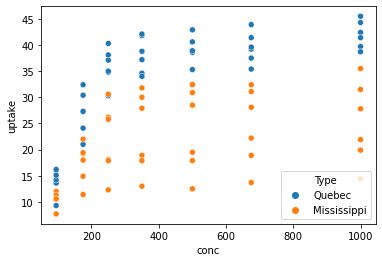

In [40]:
#outro jeito Seaborn
sns.scatterplot(data = base3, x= "conc", y= "uptake", hue = "Type")

In [41]:
# Seleção filtrando pelo Type.
q = base3.loc[base3['Type'] == 'Quebec']
m = base3.loc[base3['Type'] == 'Mississipi']

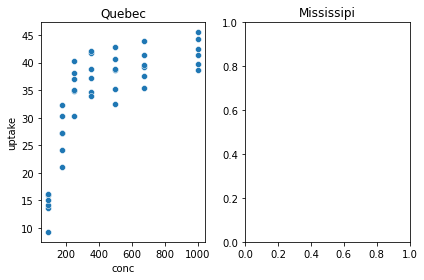

In [42]:
plt.figure()
plt.subplot(1,2,1)
sns.scatterplot(data = q, x = "conc", y = "uptake").set_title('Quebec')
plt.subplot(1,2,2)
sns.scatterplot(data = m, x = "conc", y = "uptake").set_title('Mississipi')
plt.tight_layout()

In [43]:
# Seleção filtrando pelo Tratamento.
ch = base3.loc[base3['Treatment'] == 'chilled']
nc = base3.loc[base3['Treatment'] == 'nonchilled']

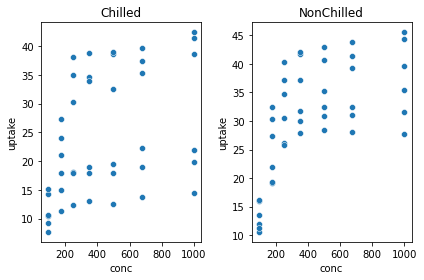

In [44]:
plt.figure()
plt.subplot(1,2,1)
sns.scatterplot(data = ch, x = "conc", y = "uptake").set_title('Chilled')
plt.subplot(1,2,2)
sns.scatterplot(data = nc, x = "conc", y = "uptake").set_title('NonChilled')
plt.tight_layout()

#### Exemplo 2. Cance Esofago

In [45]:
base4 = pd.read_csv('esoph.csv')
base4

,agegp,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27
...,...,...,...,...,...
83,75+,40-79,30+,1,1
84,75+,80-119,0-9g/day,1,1
85,75+,80-119,10-19,1,1
86,75+,120+,0-9g/day,2,2


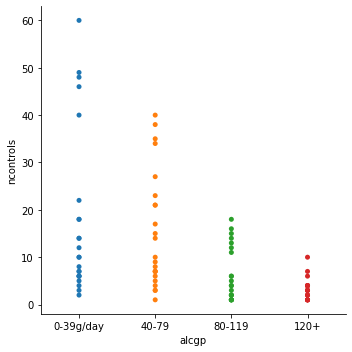

In [46]:
sns.catplot(x = 'alcgp', y = 'ncontrols', data = base4, jitter = False)

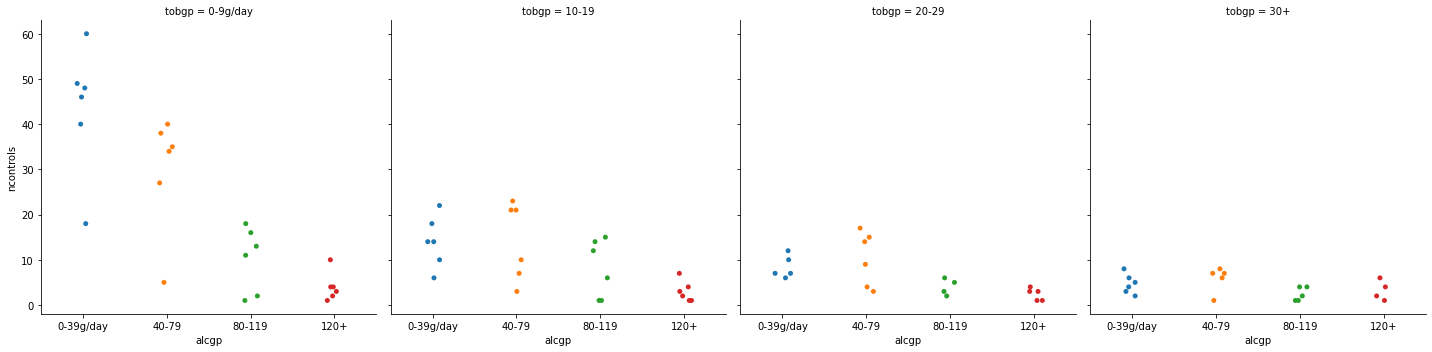

In [47]:
sns.catplot(x = 'alcgp', y = 'ncontrols', data = base4, col = 'tobgp')

- Os gráficos acima permite comparar os dados com a coluna tobgp.

### Adicionando Legendas

In [48]:
#Não esquecer de importar
#import pantas as pd
#import matplotlib.pyplot as plt

In [49]:
base3 = pd.read_csv('co2.csv')
base3.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


- o arquivo co2,csv precisa está no diretório em que esse notebook está para poder funcionar
- a tabela mostra informações de plantas, o tipo de tratamento, e a concentração de co2

In [50]:
#separar duas colunas distintas para se tornarem variáveis de um gráfico
x = base.conc
y = base.uptake

AttributeError: 'DataFrame' object has no attribute 'conc'

In [ ]:
#tratamento da coluna Tratment, distinguindo entre 'nonchilled' e 'chilled'
unicos = list(set(base.Treatment))
unicos

In [ ]:
for i in range(len(unicos)): #função laço
    indice = base.Treatment == unicos [i]
    plt.scatter(x[indice], y[indice], label = unicos[i])
plt.legend(loc = 'lower right') #posicionamento da legenda

### Divisão de tela.

Útil quando se quer comparar diferentes atributos de um mesmo conjunto de dados. Por exemplo, um gráfico de dispersão permite que se compare apenas 2 atributos. Mas com a técnica de divisão de tela, é possível comparar pares de 2 atributos.

In [ ]:
#Não esquecer de importar
#import pandas as pd
#import matplotlib.pyplot as plt


In [ ]:
base = pd.read_csv('trees.csv')
base.head()

In [ ]:
#relaciona Girth com Volume
plt.scatter(base.Girth, base.Volume)

In [ ]:
#relaciona Girth com Height
plt.scatter(base.Girth, base.Height)

In [ ]:
#relaciona Height com volume
plt.scatter(base.Height, base.Volume)

In [ ]:
#histograma volume
plt.hist(base.Volume)

In [ ]:
#dividindo a tela. imprimindo os gráficos juntos
plt.figure(1) #cria o elemento 1, que é um gráfico (contendo outros gráficos como se pode entender adiante)
plt.subplot(2,2,1)
plt.scatter(base.Girth, base.Volume)
plt.subplot(2,2,2)
plt.scatter(base.Girth, base.Height)
plt.subplot(2,2,3)
plt.scatter(base.Height, base.Volume, marker = "*")
plt.subplot(2,2,4)
plt.hist(base.Volume)

- (2,2,1): 2 e 2 corresponde ao número de linhas e colunas. O Número 1 corresponde a posição do gráfico no elemento gerado.

## Boxplot

In [ ]:
#Não esquecer de importar
#import pandas as pd
#import matplotlib.pyplot as plt

In [ ]:
base = pd.read_csv('trees.csv')
base.head()

É possível usar o gráfico Boxplot com vários atributos. No exemplos usa só a coluna Volume.

In [ ]:
plt.boxplot(base.Volume, vert = False, showfliers = False, notch = True, patch_artist = True)
plt.title('Árvores')
plt.xlabel('Volume')

**plt.boxplot(base.Volume, vert = False, showfliers = False, notch = True, patch_artist = True)** <br>.
- **base.Volume**: referência da coluna de dados usada. No caso 'Volume'
- **vert = False**: O gráfico é gerado na forma HORIZONTAL
- **showfliers = False**: Não mostra os pontos 'outliers'
- **notch = True** : Cria um taglio. Um corte próximo a mediana. A linha vermelha
- **patch_artist = True**: Preenche o boxplot com uma cor



In [ ]:
plt.boxplot(base.)
plt.title('Árvores')
plt.xlabel('Dados')

In [ ]:
plt.boxplot(base.Volume, vert = False)
plt.boxplot(base.Girth, vert = False)
plt.boxplot(base.Height, vert = False)
plt.title('Árvores')
plt.xlabel('Dados')

### Usando o Seaborn

In [ ]:
#Não esquecer de importar 
#import pandas as pd
#import seaborn as srn

In [ ]:
base = pd.read_csv('trees.csv')
base.head()

In [ ]:
#sns.boxplot(base.Volume).set_title('Árvores')
ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [ ]:
sns.boxplot(data = base)

## Gráficos de Barras e de Setores

In [ ]:
#Não esquecer de importar
#import pandas as pd

In [ ]:
base = pd.read_csv('insect.csv')
base.shape #retorna resumo de instâncias e atributos constante nos dados

 - Retornou que o dado em questão possui 72 linhas (instâncias) e 2 colunas (atributos)

In [ ]:
base.head()

 - Para poder trabalhar com gráfico de setores (ou de pizza como é conhecido) e gráfico de barra, é necessário **consolidar esses dados**. Isto é, **agrupá-los**.
 - Isso irá significar que e necessário somar toda a contagem do Spray dos diversos tipos. Tipo um resumo a partir de uma das 2 categorias existentes nesse DF.

In [ ]:
agrupado = base.groupby(['spray'])['count'].sum() #função que agrupa e retorna o resumo  
agrupado

In [ ]:
#Gráfico de barras com cor cinza
agrupado.plot.bar(color = 'gray')

In [ ]:
#Gráfico de barra com cores diversas
agrupado.plot.bar(color = ['blue', 'yellow', 'red', 'green', 'pink', 'orange'])

In [ ]:
#Gráfico de Pizza
agrupado.plot.pie()

In [ ]:
#Gráfico de pizza com legenda
agrupado.plot.pie(legend = True)

## Gráfico 3D

- Usará 3 atributos (colunas) para gerar os pontos no gráfico.
- Como resultado será um gráfico 3D estático

In [51]:
# Não esquecer de importar bibliotecas
#import pandas as pd
#import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [52]:
base5 = pd.read_csv('orchard.csv')
base5

,decrease,rowpos,colpos,treatment
0,57,1,1,D
1,95,2,1,E
2,8,3,1,B
3,69,4,1,H
4,92,5,1,G
...,...,...,...,...
59,14,4,8,B
60,86,5,8,H
61,55,6,8,E
62,3,7,8,A


Text(0.5, 0, 'colpos')

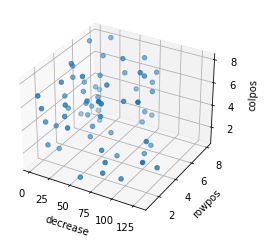

In [55]:
figura = plt.figure()
eixo = figura.add_subplot(1, 1, 1, projection = '3d')
eixo.scatter(base5.decrease, base5.rowpos, base5.colpos)
eixo.set_xlabel('decrease')
eixo.set_ylabel('rowpos')
eixo.set_zlabel('colpos')